# Bitácora de Laboratorio: Torque Magnético
**Curso:** Laboratorio Intermedio de Física  
**Fecha:** 2025-09-03  
**Integrantes:** Ángela Bustos y  Mariana Montoya. 

---
## Objetivos
- Medir el momento magnético usando métodos estáticos y dinámicos.
- Observar precesión y resonancia magnética.
- Comparar resultados con el modelo teórico.

---
## Marco Teórico (resumen mínimo)
Torque sobre dipolo: $\vec{\tau}=\vec{\mu}\times\vec{B}$.  
Fuerza en campo no uniforme: $\vec{F}=(\vec{\mu}\cdot\nabla)\vec{B}$.  
Pequeñas oscilaciones: $T^2=\dfrac{4\pi^2 I}{\mu B}$.  
Precesión: $\Omega=\dfrac{\mu B}{L_s}$.

---
## Montaje (breve)
Arreglo de bobinas, unidad de control, estroboscopio, bola de resina con imán.


In [10]:
m_bolita = 141.3 
d_varilla = 9.71
r_bolita = 4.81/2
l_manija= 0.82

err_pie_rey = 0.05
err_unidad = 0.5

In [3]:
l_peso = [5.04,5.77,1.33,2.35,0,2.62,3.7] 
I_palo = [3.1,3.3,2.3,2.5,2.12.6,2.8]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (782081403.py, line 2)

In [12]:
l_peso = [5.04,5.77,1.33,2.35,0,2.62,3.7] 
I_palo = [3.1,3.3,2.3,2.5,2,12.6,2.8]

In [13]:
I = [1.5,1,1.2,1.3,1.4,1.6,1.15,1.25,1.35,1.45]
t = [26.9,30.64,28.69,28.49,27.28,31.40,30.24,29.10,28.02,27.28] #Segundos
print(len(I))

10


In [14]:
f = 3.8
I = [1,1.5,2,2.5,3,3.5,4]
T = [10.27, 7.63,4.81, 3.55, 2.51, 1.91, 1.72 ]

In [18]:
# Imports y utilidades
import numpy as np
import matplotlib.pyplot as plt

# Para regresiones simples con incertidumbre de parámetros
def fit_line(x, y):
    # Devuelve pendiente, intercepto y covarianza
    p, cov = np.polyfit(x, y, deg=1, cov=True)
    m, b = p
    sm, sb = np.sqrt(np.diag(cov))
    return (m, sm), (b, sb)

# Mostrar tabla rápida
def show_table(headers, rows):
    # simple print table
    col_widths = [max(len(h), *(len(str(r[i])) for r in rows)) for i,h in enumerate(headers)]
    fmt = " | ".join("{:<" + str(w) + "}" for w in col_widths)
    print(fmt.format(*headers))
    print("-+-".join("-"*w for w in col_widths))
    for r in rows:
        print(fmt.format(*r))


### Constantes del sistema (ajusta según tu equipo)
Desde la guía del laboratorio (normalizado a 1 A):
- $B/I \approx 1.36\times10^{-3}\ \mathrm{T/A}$  
- $\partial B/\partial z \approx 1.69\times10^{-2}\ \mathrm{T/(A\,m)}$


In [6]:
# Constantes (ajusta si tu calibración difiere)
k_BI = 1.36e-3   # T/A
dB_dz_I = 1.69e-2  # T/(A m)

# Densidad del aire/rozamiento no se modela aquí; anota en discusión.
print("k_BI (T/A) =", k_BI)


k_BI (T/A) = 0.00136


---
## Actividad 1: Equilibrio estático
Relación esperada: $\mu B = rmg + dMg$.  
Ingresar mediciones (m, r, B) para varias posiciones. Calcular $rmg$ y graficar vs. $B$.


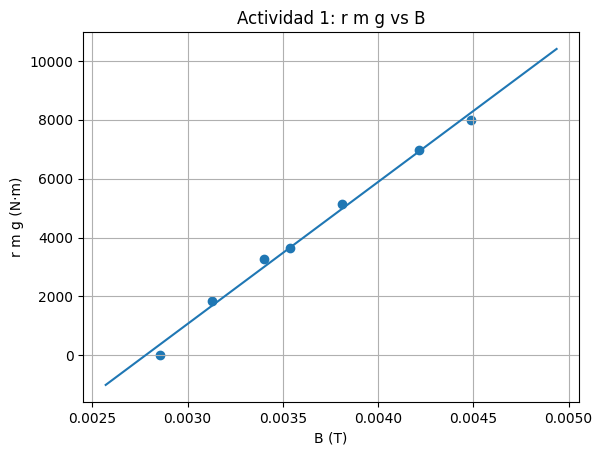

Pendiente = 4.8217e+06 ± 1.8e+05  [N·m/T]  => μ_est = pendiente
Intercepto = -1.340e+04 ± 6.6e+02
μ (Actividad 1) ≈ 4821733.137310896 A·m^2


In [23]:
# ==== Datos de Actividad 1 (edita con tus medidas) ====
# masas en kg, r en m, corriente en A

m_bolita = 141.3 
d_varilla = 9.71
r_bolita = 4.81/2
l_manija= 0.82
g = 9.80665

err_pie_rey = 0.05
err_unidad = 0.5

l_peso = np.array([5.04,5.77,1.33,2.35,0,2.62,3.7])
I_palo = np.array([3.1,3.3,2.3,2.5,2.1,2.6,2.8])


# campo magnético B a partir de I
B = k_BI * I_palo

y = l_peso * m_bolita * g  # r m g
x = B

(mfit, smfit), (bfit, sbfit) = fit_line(x, y)

plt.scatter(x, y)
plt.xlabel("B (T)")
plt.ylabel("r m g (N·m)")
plt.title("Actividad 1: r m g vs B")
plt.grid()
# línea de ajuste
xx = np.linspace(x.min()*0.9, x.max()*1.1, 100)
plt.plot(xx, mfit*xx + bfit)
plt.show()

print(f"Pendiente = {mfit:.4e} ± {smfit:.1e}  [N·m/T]  => μ_est = pendiente")
print(f"Intercepto = {bfit:.3e} ± {sbfit:.1e}")
mu_est_act1 = mfit
print("μ (Actividad 1) ≈", mu_est_act1, "A·m^2")


---
## Actividad 2: Oscilación armónica
Relación esperada: $T^2 = \dfrac{4\pi^2 I}{\mu B}$.  
Graficar $T^2$ vs $1/B$ y ajustar línea: pendiente $=\dfrac{4\pi^2 I}{\mu}$.


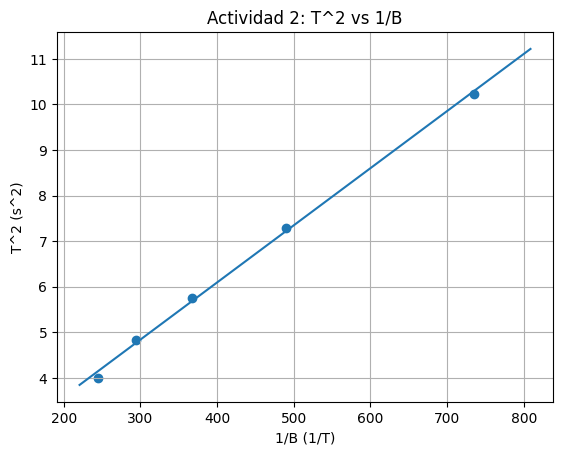

Pendiente = 1.2537e-02 ± 3.0e-04  [s^2·T]
Intercepto = 1.079e+00 ± 1.4e-01  [s^2]
I (momento de inercia) = 5.331200000000001e-05 kg·m^2
μ (Actividad 2) ≈ 1.6788e-01 ± 4.0e-03 A·m^2


In [8]:
# ==== Datos de Actividad 2 (edita con tus medidas) ====
# Corriente (A) y tiempos para 20 oscilaciones (s)
I2 = np.array([1.0, 1.5, 2.0, 2.5, 3.0])   # A  <-- EDITAR
t20 = np.array([64.0, 54.0, 48.0, 44.0, 40.0])  # s <-- EDITAR (tiempo de 20 oscilaciones)

B2 = k_BI * I2
T = t20 / 20.0
y = T**2
x = 1.0 / B2

(mfit2, smfit2), (bfit2, sbfit2) = fit_line(x, y)

plt.scatter(x, y)
plt.xlabel("1/B (1/T)")
plt.ylabel("T^2 (s^2)")
plt.title("Actividad 2: T^2 vs 1/B")
plt.grid()
xx = np.linspace(x.min()*0.9, x.max()*1.1, 100)
plt.plot(xx, mfit2*xx + bfit2)
plt.show()

# Momento de inercia (bola maciza)
M_bola = 0.170  # kg  <-- EDITAR
R_bola = 0.028  # m   <-- EDITAR
I_mom = (2/5)*M_bola*(R_bola**2)

mu_est_act2 = (4*np.pi**2 * I_mom) / mfit2
# Propagación simple por pend.
dmu2 = mu_est_act2 * (smfit2/abs(mfit2))

print(f"Pendiente = {mfit2:.4e} ± {smfit2:.1e}  [s^2·T]")
print(f"Intercepto = {bfit2:.3e} ± {sbfit2:.1e}  [s^2]")
print("I (momento de inercia) =", I_mom, "kg·m^2")
print("μ (Actividad 2) ≈ {:.4e} ± {:.1e} A·m^2".format(mu_est_act2, dmu2))


---
## Actividad 3: Precesión
Relación esperada: $\Omega = \dfrac{\mu B}{L_s}$.  
Graficar $\Omega$ vs $B$; pendiente $=\mu/L_s$.


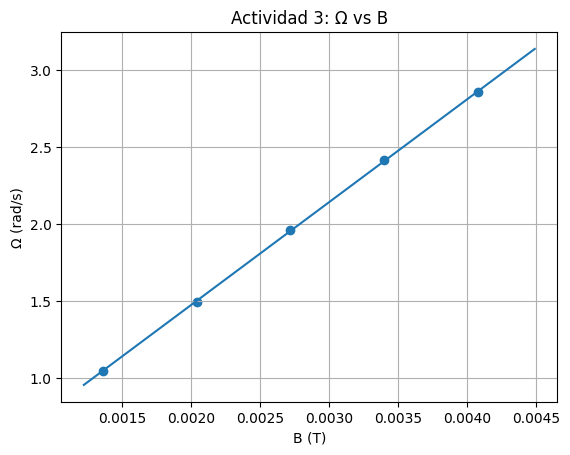

Pendiente = 6.6738e+02 ± 3.8e+00  [s^-1·T^-1]
μ (Actividad 3) ≈ 1.3348e+00 ± 7.6e-03 A·m^2 (con Ls asumido=0.002)


In [9]:
# ==== Datos de Actividad 3 (edita con tus medidas) ====
# Corriente (A) y periodos de precesión (s)
I3 = np.array([1.0, 1.5, 2.0, 2.5, 3.0])  # A  <-- EDITAR
Tprec = np.array([6.0, 4.2, 3.2, 2.6, 2.2])  # s  <-- EDITAR

B3 = k_BI * I3
Omega = 2*np.pi / Tprec  # rad/s

(mfit3, smfit3), (bfit3, sbfit3) = fit_line(B3, Omega)

plt.scatter(B3, Omega)
plt.xlabel("B (T)")
plt.ylabel("Ω (rad/s)")
plt.title("Actividad 3: Ω vs B")
plt.grid()
xx = np.linspace(B3.min()*0.9, B3.max()*1.1, 100)
plt.plot(xx, mfit3*xx + bfit3)
plt.show()

# Si conoces L_s, puedes obtener μ = pendiente * L_s
L_s = 0.002  # kg·m^2/s  <-- EDITAR (momento angular de espín)
mu_est_act3 = mfit3 * L_s
dmu3 = L_s * smfit3

print(f"Pendiente = {mfit3:.4e} ± {smfit3:.1e}  [s^-1·T^-1]")
print("μ (Actividad 3) ≈ {:.4e} ± {:.1e} A·m^2 (con Ls asumido={})".format(mu_est_act3, dmu3, L_s))


---
## Comparación de resultados
Completa con los valores estimados de $\mu$ de cada actividad y discute la compatibilidad.

- Fuentes de error: campo terrestre, fricción, no uniformidad de $B$, lectura del estroboscopio.

- Sugerencias de mitigación: nivelación, repetir medidas, promediar, controlar corrientes externas.
